In [1]:
import numpy as np
import scipy.stats as sts
from scipy.ndimage import convolve

import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
from matplotlib import colors


# Problem 1: Design A Model

At which scale do you choose to describe the microscopic components and what are those
components? Briefly describe other scales (larger and/or smaller) at which you could have
chosen to model the microscopic state and why your chosen scale is the most appropriate.

+ What states can the microscopic components take on?
+ What are the relationships between the components?
+ How do the states of the components change over time? Some of these changes may depend on interactions between the components while other changes may not.

Today, I dropped a euro into the tip jar at the Indian store. As a visibly cash-strapped student, I am not known to have a tipping nature, and Berlin is not famous for its tipping culture. There was nothing spectacular to how he scanned the barcodes as we mentioned which states in India we were from. 

A euro buys you 1/3 of a falafel sandwich, which is my daily bread. Despite that, there was a brief force of instinct that made me feel like I wasn't parting ways with it, a feeling of kinship that discounted my selfish perception of loss. Walking out, I asked myself if he would do the same thing - perhaps remembering me the next time I walked in and giving me an extra packet of instant noodles. I asked myself if my altruism was cued by the colors of our skin being the same and if I would repeat the gesture. 

It turns out that the [Green-beard effect](https://en.wikipedia.org/wiki/Green-beard_effect) thought experiment captures the last question - "I have a green beard and I will be altruistic to anyone else with a green beard." Framing the anecdote in this lens of genetics, we have two genes: one for a phenotype (brown skin) and one for altruistic behavior (tipping).  This becomes interesting as these alleles can combine in *four* possible alleles or agent states:

<table>
  <tr>
    <td>Brown, Tipper </td>
    <td>Not Brown, Tipper  </td>
  </tr>
  <tr>
    <td>Brown, Non-Tipper </td>
    <td>Not Brown, Non-Tipper</td>
  </tr>
</table>

A brown tipper will tip if another agent is brown, according to the green-beard effect. But notably, the other agent could be a reciprocal tipper (i.e., the store clerk who gives a discount the next time around) or a non-tipper (i.e., the store clerk who asks you where you are from the next time around, vaguely pretending not to remember you). Because an agent cannot "see" altruism, they are inferring it from a physical trait. In the base case, the naive odds are 50/50 to both agents being brown tippers. However, the actual frequency of these alleles depends on both the larger population and how alleles are selected for over time. And so, we need to frame ideas of "birth," "death," and "reproduction" that take place at each population "generation," such that a process of natural selection can take place over the gene pool. 

Every generation is a pair of non-consecutive days, and each generation, a fixed population of $n$ agents with equally-sized subpopulations $p_{customers}$ and $p_{clerks}$ are sent to a vast Indian store. We can give each allele an equal opportunity on initialization by randomly assigning each customer and clerk to one of the four states above. Each customer is randomly paired to a clerk during the first day, and a given customer will tip according to the green-beard effect. During the "next" day, the same customer will approach the same clerk, who will respond to a tip if and only if the clerk is either (Brown, Tipper), or (Not Brown, Tipper) - that is, also according to the green-bear effect. The interesting case here is if a customer who tipped (Brown, Tipper) is faced with a "poser" clerk (Brown, Non-Tipper) the following day. In this case, the customer gets disgruntled, goes home, and updates their state from (Brown, Tipper) to (Brown, Non-Tipper) with some probability. Simultaneously, as we are letting genes switch around on call, we can imagine a situation where the "poser" clerk returns home on the first day and switches their state from (Brown, Non-Tipper) to (Tipper) the next day. 

A population-level allele distribution governs interactions, but these distributions are in turn controlled by agent-level state changes on a generation-by-generation basis. So to study the emergence of the emergence, extinction of, or sustainability of green-beard tipping, we want to trace the changes in the frequency of non-tipper vs. tipper alleles. 

# Problem 2: Is the random module random?

We check if NumPy’s random module generates values that appear to be random. If the model is
2 random, we should get integers selected from a range at random approximately equally often. Use
the code below to generate an array of 1,000,000 random integers from 0 to 99.

<ipython-input-2-c3a2879729c8>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in axs[1].get_yticks()])


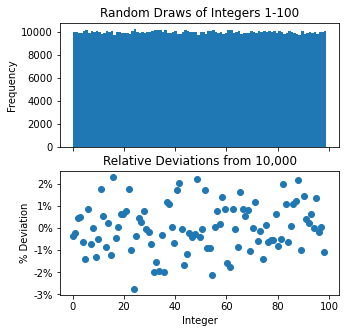

In [2]:
n = 1000000
numbers = np.random.randint(100, size=n)


fig, axs = plt.subplots(2,1, figsize = (5,5), sharex=True)

(n, bins, patches) = axs[0].hist(numbers, bins = 100)
axs[0].set_title("Random Draws of Integers 1-100")
axs[0].set_ylabel("Frequency")
axs[1].set_xlabel("Integer")

axs[1].set_title("Relative Deviations from 10,000")
axs[1].scatter(bins[:-1], (10000 - n)/n)
axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in axs[1].get_yticks()])
axs[1].set_ylabel("% Deviation")

plt.show()

A good random number generator samples each integer from a uniform distribution, such that for 100 integers and 1,1,000,000 draws, each integer has a probability of 1/10,000 (100/1,000,000) of being drawn. The distribution plotted above appears uniform, with each integer being drawn about 10,000 times. Additionally, the deviations from the expectation of 10,000 draws appears to be homoscedastic (and even normally distributed (!)), with no favourability towards any particular integers. This is what we expect from a good random number generator. 

However, we can extend the idea of expectation further still. Each integer $X_i (i = 1 ... 100)$ is drawn with probability 1/100, with each randint sample representing a bernoulli trial. Therefore, we can model the 'successes', i.e. the number of times we draw an integer $X_i$, with a binomial distribution;

$$ X_i \sim B(n = 1,000,000, p = 0.01) $$

We can overlay samples from the theoretical binomial distribution with the distribution of integer counts, 

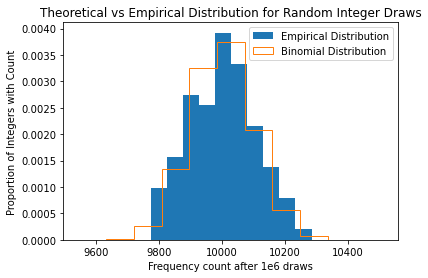

In [3]:
p = 0.01

# Retrieve counts for each integer
ints, counts = np.unique(numbers, return_counts = True)
(n, bins, patches) = plt.hist(counts, density= True, label = "Empirical Distribution")

# Plot theoretical dist
samples = sts.binom(int(1e6), p).rvs(1000000)

# Overlay binomial samples
plt.hist(samples, density= True, bins = len(bins), histtype='step', label= "Binomial Distribution")
plt.xlabel("Frequency count after 1e6 draws")
plt.ylabel("Proportion of Integers with Count")
plt.title("Theoretical vs Empirical Distribution for Random Integer Draws")
plt.legend()
plt.show()


These match up reasonable well, and confirm what we saw in the plot of deviations. According to CLT, we expect the distribution of the sum of independent and iid variables to approach a normal distribution - which is exactly what we get with a binomial distribution (above) as n tends to infinity. 

# Problem 3: Forest Fire Mean-Field Approximation 

The following Rulset enumerates state changes for cells in state empty, tree and fire: 

1. p(fire -> empty) = 1
2. p(tree -> fire) = (1 -g), if at least 1 neighbor is f. 
3. p(tree -> fire) = (1 - g)f
4. p(empty -> tree) = p


1. $∆\rho_e = \rho_f − p\rho_e $

    We can decompose the *change* in the mean-field proportion of empty cells ($\rho_e$) to an *increase* and *decrease* in $\rho_e$ over successive updates. According to Rules 1 and 4, this occurs when a fire changes to an empty cell or when an empty cell sprouts a tree, respectively, with probability $p$. The mean-field approximation steps in by applying these two possible state transitions to proportions of empty cells and cells on fire in aggregate, such that the change in the proportion of empty spaces is the increase by the proportion of cells on fire ($\rho_f$), subtracting the decrease given by the proportion of cells empty which happen to sprout trees ($p*\rho_e$).
    
2. $ ∆\rho_t = p\rho_e - \rho_t(1-g)(f + (1-f)(1 - (1-\rho_f)^{2d})) $

   A change in $ρ_t$ occurs with Rules 2,3,4. Rule 4 is the only possible way the $\rho_t$ increases, which we can model as before with $p*ρ_e$. Rules 2 and 3 describe how ρ_t can decrease, depend on whether a cell's neighbors are on fire or not. Specifically, they depend on whether a cell has at least one neighbor on fire. This relation has a valuable property: 

   $$ P(\text{At least one Neighbour on Fire}) = 1 - P(\text{No Neighbour on Fire}) $$

   A given neighbor is *not* on fire with a probability $ 1 - \rho_f $ (which is really where the mean-field approximation goes from a stretch to gymnastics). For a 2D Von Neumann neighborhood, we have four neighbors (N, S, E, W), each with the aforementioned probability of $(1 - \rho_f)$. So the probability of No Neighbour on Fire, which is to say, all four independent not-burnings taking place is $(1 - \rho_f)^4$. Tying it together, the probability of at least one neighbor on fire is $(1 - (1 - \rho_f)^4)$, where 4 specifies the number of neighbors in the Von Neumann neighborhood with a dimension (d) of 2. Generalised, this is $(1 - (1 - \rho_f)^{2d})$. 

   Now we can reconsider the Rules which govern how the proportion of trees increase: of the proportions of trees, first when a non-immune tree catches fire due to an act of God (with probability $f$), and next when a neighborly fire diffuses to a non-immune tree, given that it is *not* an act of God (with probability $1-f$), respectively:

   $$ \rho_t(1 - g)(f) + \rho_t(1 - g)((1-f)(1 - (1 - \rho_f)^{2d})) $$

   The $(1-f)$ term is crucial here as these are mutually exclusive events - one cannot happen at the same time as the other. Grouping common terms together and adding the way that the proportion of trees can increase, the equation simplifies to $ ∆\rho_t = p\rho_e - \rho_t(1-g)(f + (1-f)(1 - (1-\rho_f)^{2d}))$.

3. $ ∆ρ_f = -\rho_f + \rho_t(1-g)(f + (1-f)(1 - (1-\rho_f)^{2d})) $

    The proportion of cells on fire decreases when fire changes to empty, which occurs with certainty after a step, and increases when trees catch fire, which we calculated earlier as $\rho_t(1-g)(f + (1-f)(1 - (1-\rho_f)^{2d}))$. Together, this yields $-\rho_f + \rho_t(1-g)(f + (1-f)(1 - (1-\rho_f)^{2d}))$. 

# Problem 4: Wire World

In [4]:
def sum_neighbours(grid):
    """Moore neighborhood sum, using a convolution."""
    # kernel is a matrix of the cell Moore neighborhood
    # Counts every neighbor state except cell's own state
    kernel = [[1,1,1],[1,0,1],[1,1,1]]
    ne = convolve(grid, kernel, 'int', 'constant')
    return ne

In [5]:
def update(grid):
    # Update with Rules that don't require sum
    grid_partial = np.where(grid == 2, 0, 
                   np.where(grid == 1, 2, 
                   np.where(grid == 3, 3, 
                   np.where(grid == 0, 0,0))))
                   
    # Calculate sums
    x = sum_neighbours(grid == 1)
    # Apply Wire to Electron Head rule
    updated_grid = grid_partial[:] + ((x > 0) & (x < 3) & (grid == 0))

    return updated_grid

In [6]:
# Reading from file for better PDF legibility
starting_grid = np.loadtxt('starting_grid.csv')

# Shifting to new state representation
# Thought was to do the updates bitwise, but couldn't figure it out. 
shift =  {0:3, 1:1, 2:2, 3:0}
st_grid = np.copy(starting_grid)

for k,v in shift.items():
    st_grid[starting_grid == k] = v


MovieWriter ffmpeg unavailable; using Pillow instead.


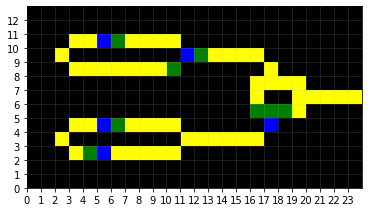

In [7]:
fig = plt.figure()

plt.xticks(range(0,st_grid.shape[1]))
plt.yticks(range(0,st_grid.shape[0]))
plt.grid(alpha = 0.2)
cm = colors.ListedColormap(['yellow','g','b','black'])

frames = []
n_frames = 180

for f in range(n_frames):
        st_grid = update(st_grid)
        frame = plt.imshow(st_grid, cmap = cm, extent = [0, st_grid.shape[1], 0, st_grid.shape[0]], animated = True)
        frames.append([frame])

# Transistor Reproduction
ArtistAnimation(fig, frames).save("transistor.gif", fps = 60)